<a href="https://colab.research.google.com/github/shrutin567/Foundation-of-Data-Science-Assignment/blob/main/fds_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SENTIMENT** **ANALYSIS** - AIRLINE REVIEWS


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("./Tweets.csv")

Saving Tweets.csv to Tweets.csv


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
tweet_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'on': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'of': 17, 'jetblue': 18, 'me': 19, 'your': 20, 'it': 21, 'was': 22, 'not': 23, 'no': 24, 'have': 25, 'at': 26, 'with': 27, 'that': 28, 'this': 29, 'get': 30, 'but': 31, 'be': 32, 'cancelled': 33, 'thanks': 34, 'now': 35, 'service': 36, 'are': 37, 'we': 38, 'from': 39, 'an': 40, 'been': 41, 'just': 42, '2': 43, 'so': 44, 'customer': 45, 'help': 46, 't': 47, 'can': 48, 'time': 49, 'co': 50, 'up': 51, 'hours': 52, 'http': 53, 'do': 54, 'hold': 55, 'they': 56, 'out': 57, 'amp': 58, 'plane': 59, "i'm": 60, 'us': 61, 'all': 62, 'will': 63, 'why': 64, 'thank': 65, 'still': 66, 'our': 67, 'delayed': 68, 'what': 69, 'when': 70, 'how': 71, 'one': 72, "can't": 73, 'flights': 74, 'call': 75, 'gate': 76, 'hour': 77, 'had': 78, 'flightled': 79, 'back': 80, 'bag': 81, 'if': 82, 'would': 83, 'after': 84, 'has': 85, '

In [ ]:
print(tweet[0])
print(encoded_docs[0])

@VirginAmerica plus you've added commercials to the experience... tacky.
[103, 575, 530, 1287, 2416, 1, 2, 177]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 54s 177ms/step - loss: 0.3938 - accuracy: 0.8343 - val_loss: 0.2108 - val_accuracy: 0.9168
Epoch 2/5
289/289 [==============================] - 51s 175ms/step - loss: 0.2206 - accuracy: 0.9131 - val_loss: 0.1689 - val_accuracy: 0.9389
Epoch 3/5
289/289 [==============================] - 54s 188ms/step - loss: 0.1642 - accuracy: 0.9357 - val_loss: 0.1801 - val_accuracy: 0.9346
Epoch 4/5
289/289 [==============================] - 50s 175ms/step - loss: 0.1374 - accuracy: 0.9484 - val_loss: 0.1706 - val_accuracy: 0.9441
Epoch 5/5
289/289 [==============================] - 51s 176ms/step - loss: 0.1125 - accuracy: 0.9596 - val_loss: 0.1786 - val_accuracy: 0.9389


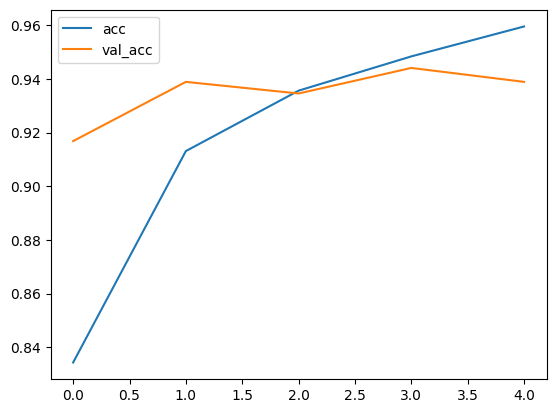

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

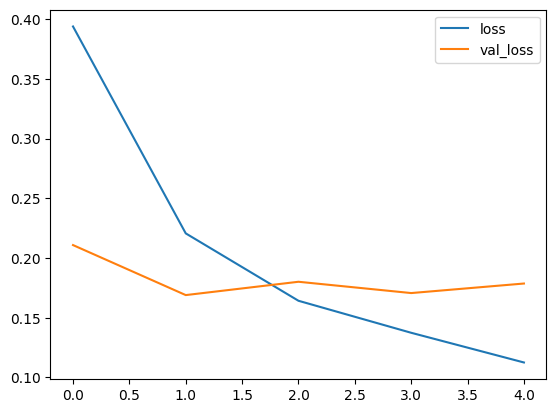

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

FINAL PREDICTED OUTPUT


In [ ]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "The worst experience of my life! Will never be flying with Delta ever again."
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 29ms/step
Predicted label:  positive
1/1 [==============================] - 0s 25ms/step
Predicted label:  negative


***WEATHER*** ***PREDICTION***

Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
<class 'pandas.core.frame.DataFra

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


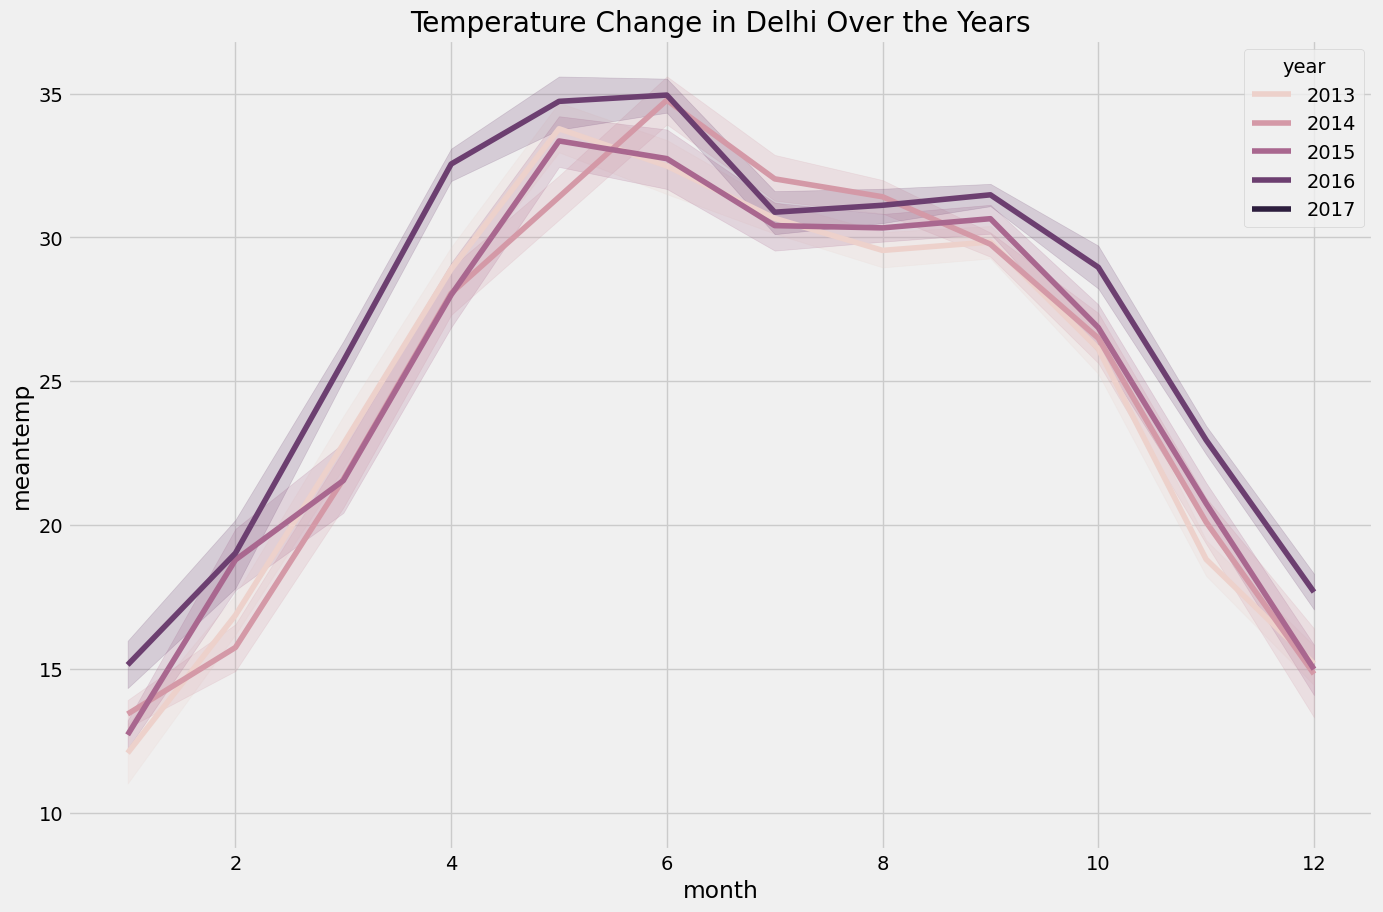

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



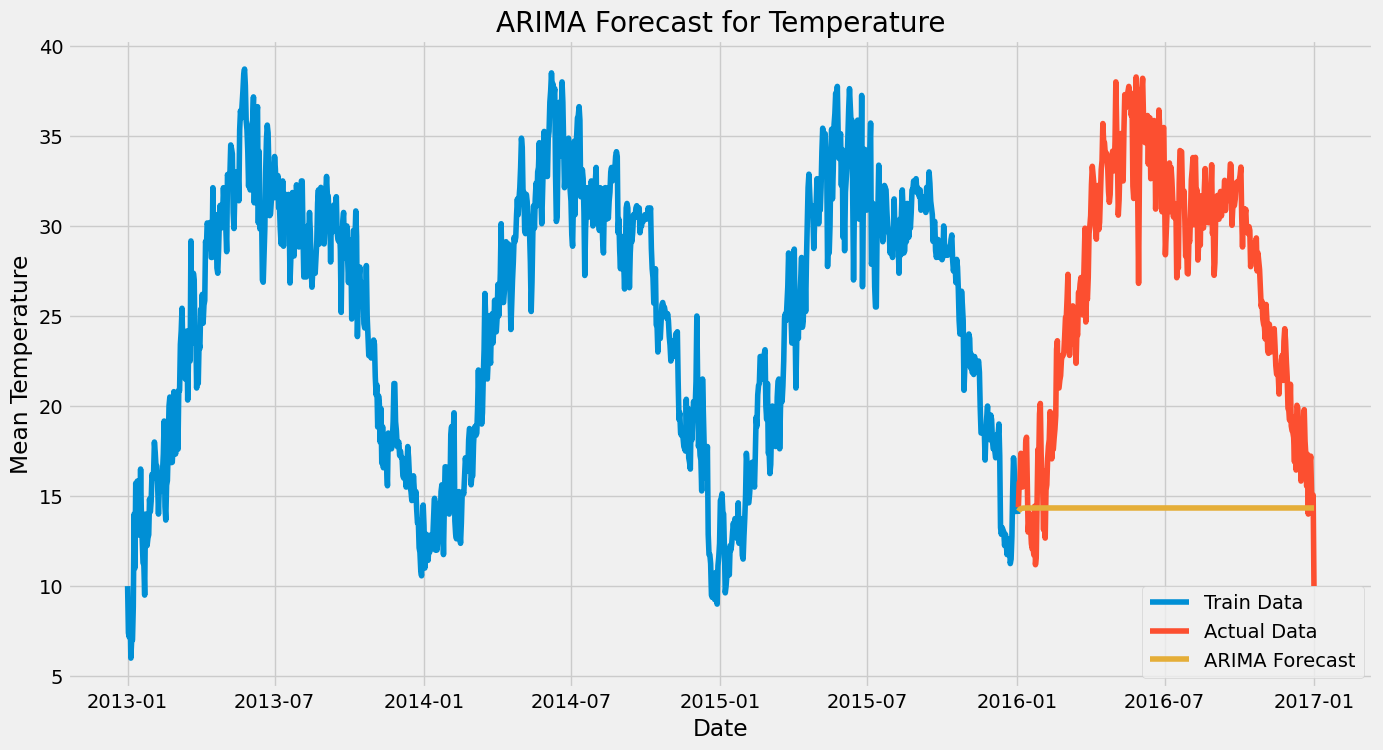

In [ ]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())
print(data.describe())
print(data.info())
figure = px.line(data, x="date", y="meantemp", title='Mean Temperature in Delhi Over the Years')
figure.show()
figure = px.line(data, x="date", y="humidity", title='Humidity in Delhi Over the Years')
figure.show()
figure = px.line(data, x="date", y="wind_speed", title='Wind Speed in Delhi Over the Years')
figure.show()
figure = px.scatter(data_frame=data, x="humidity", y="meantemp", size="meantemp",
                    trendline="ols", title="Relationship Between Temperature and Humidity")
figure.show()
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data=data, x='month', y='meantemp', hue='year')
plt.show()

# ARIMA Forecasting
forecast_data = data[['date', 'meantemp']].copy()
forecast_data['date'] = pd.to_datetime(forecast_data['date'])
forecast_data.set_index('date', inplace=True)

# Splitting data into train and test
train_data = forecast_data.iloc[:-365]
test_data = forecast_data.iloc[-365:]

# Fitting ARIMA model
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Forecasting
start_date = test_data.index[0]
end_date = test_data.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date)

# Plotting the forecast
plt.figure(figsize=(15, 8))
plt.title("ARIMA Forecast for Temperature")
plt.plot(train_data.index, train_data.values, label='Train Data')
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(predictions.index, predictions.values, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

## STOCK MARKET PREDICTION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving TSLA.csv to TSLA (1).csv
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
(2416, 7)
              Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.

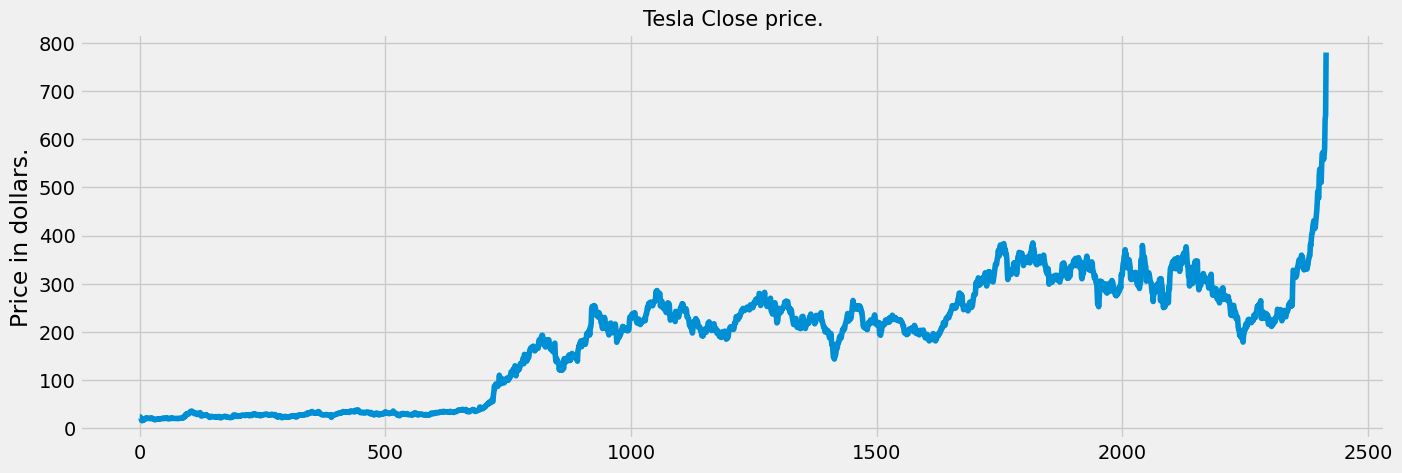

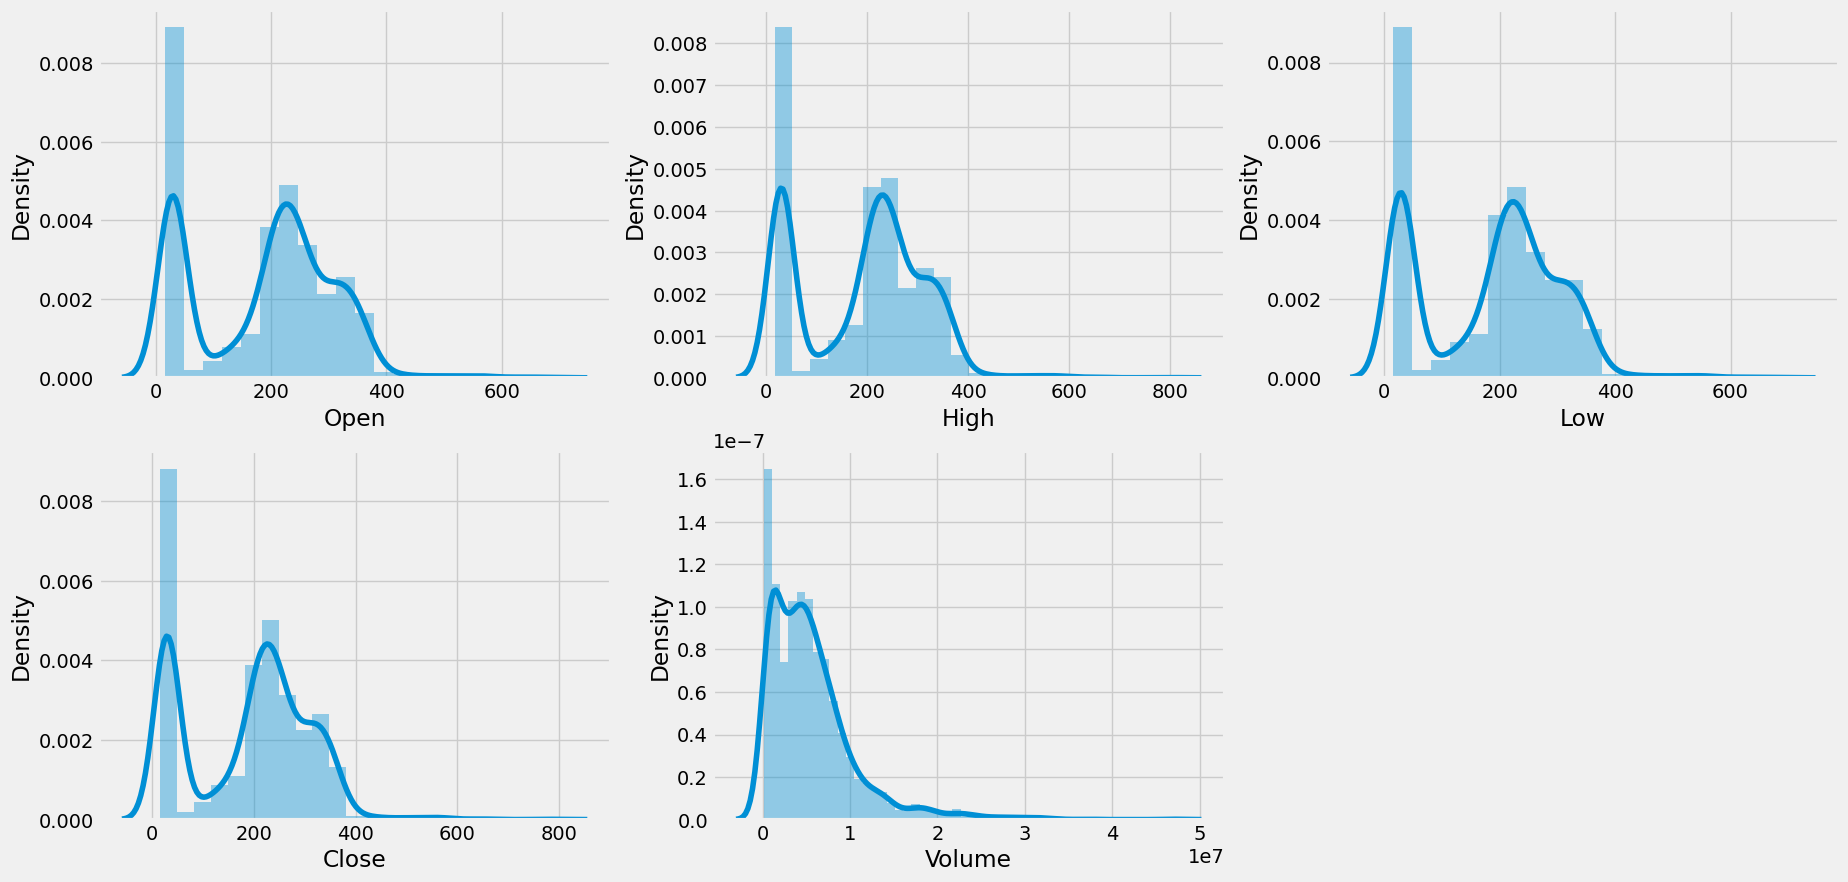

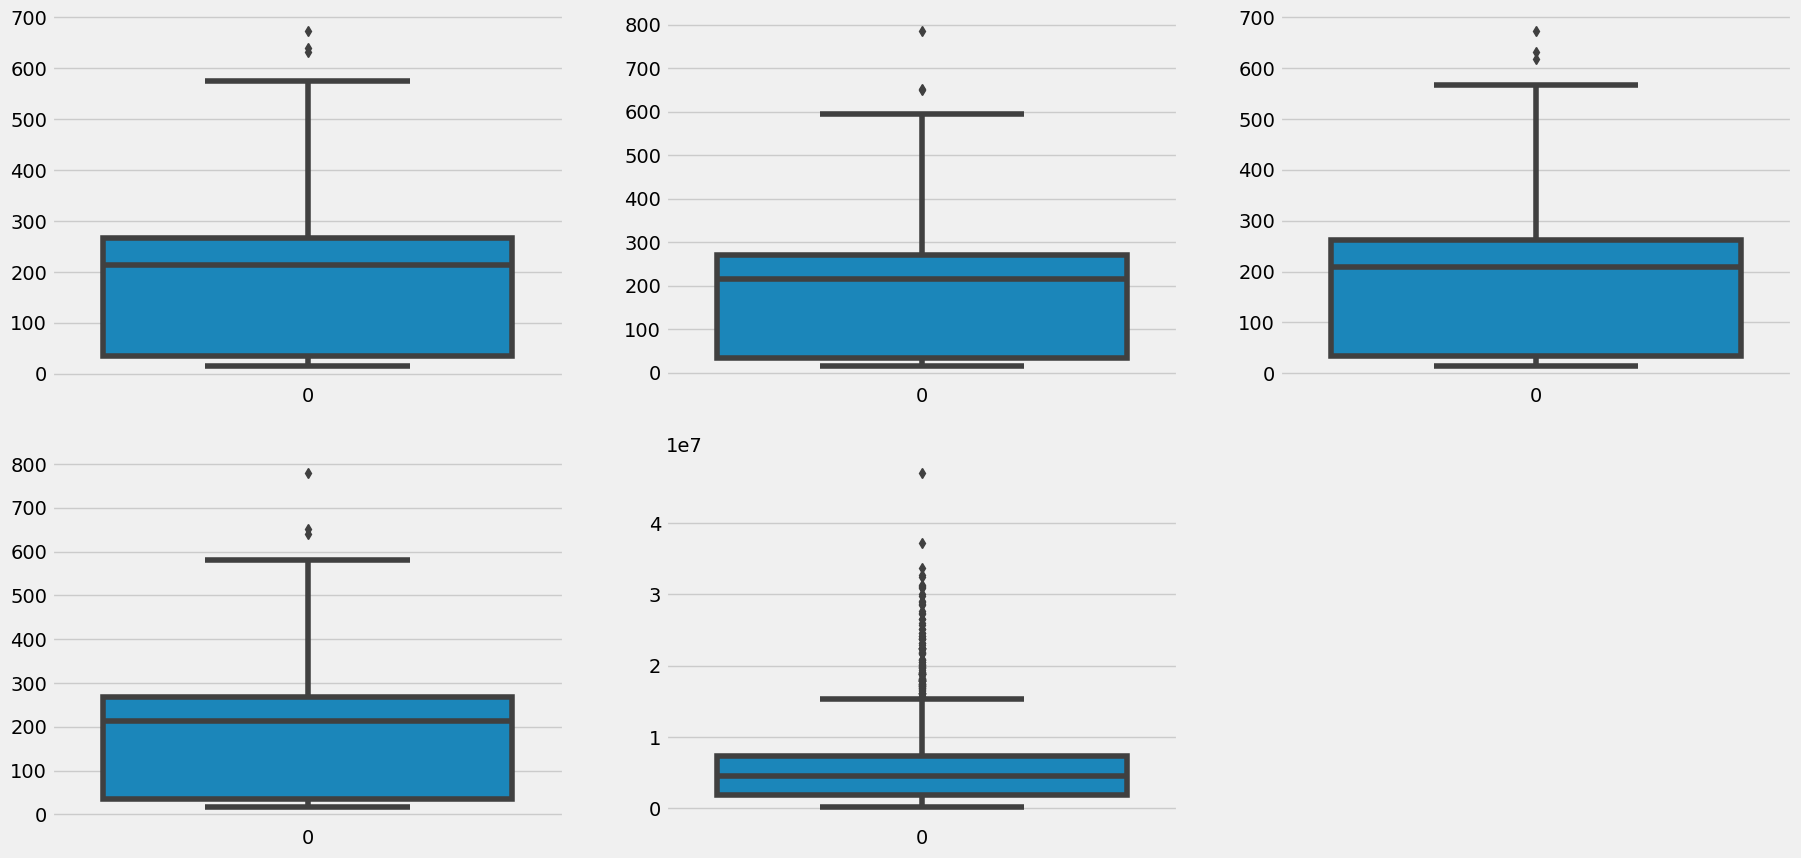

         Date       Open   High        Low      Close    Volume  day  month  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  18766300   29      6   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  17187100   30      6   
2  2010-07-01  25.000000  25.92  20.270000  21.959999   8218800    1      7   
3  2010-07-02  23.000000  23.10  18.709999  19.200001   5139800    2      7   
4  2010-07-06  20.000000  20.00  15.830000  16.110001   6866900    6      7   

   year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010  


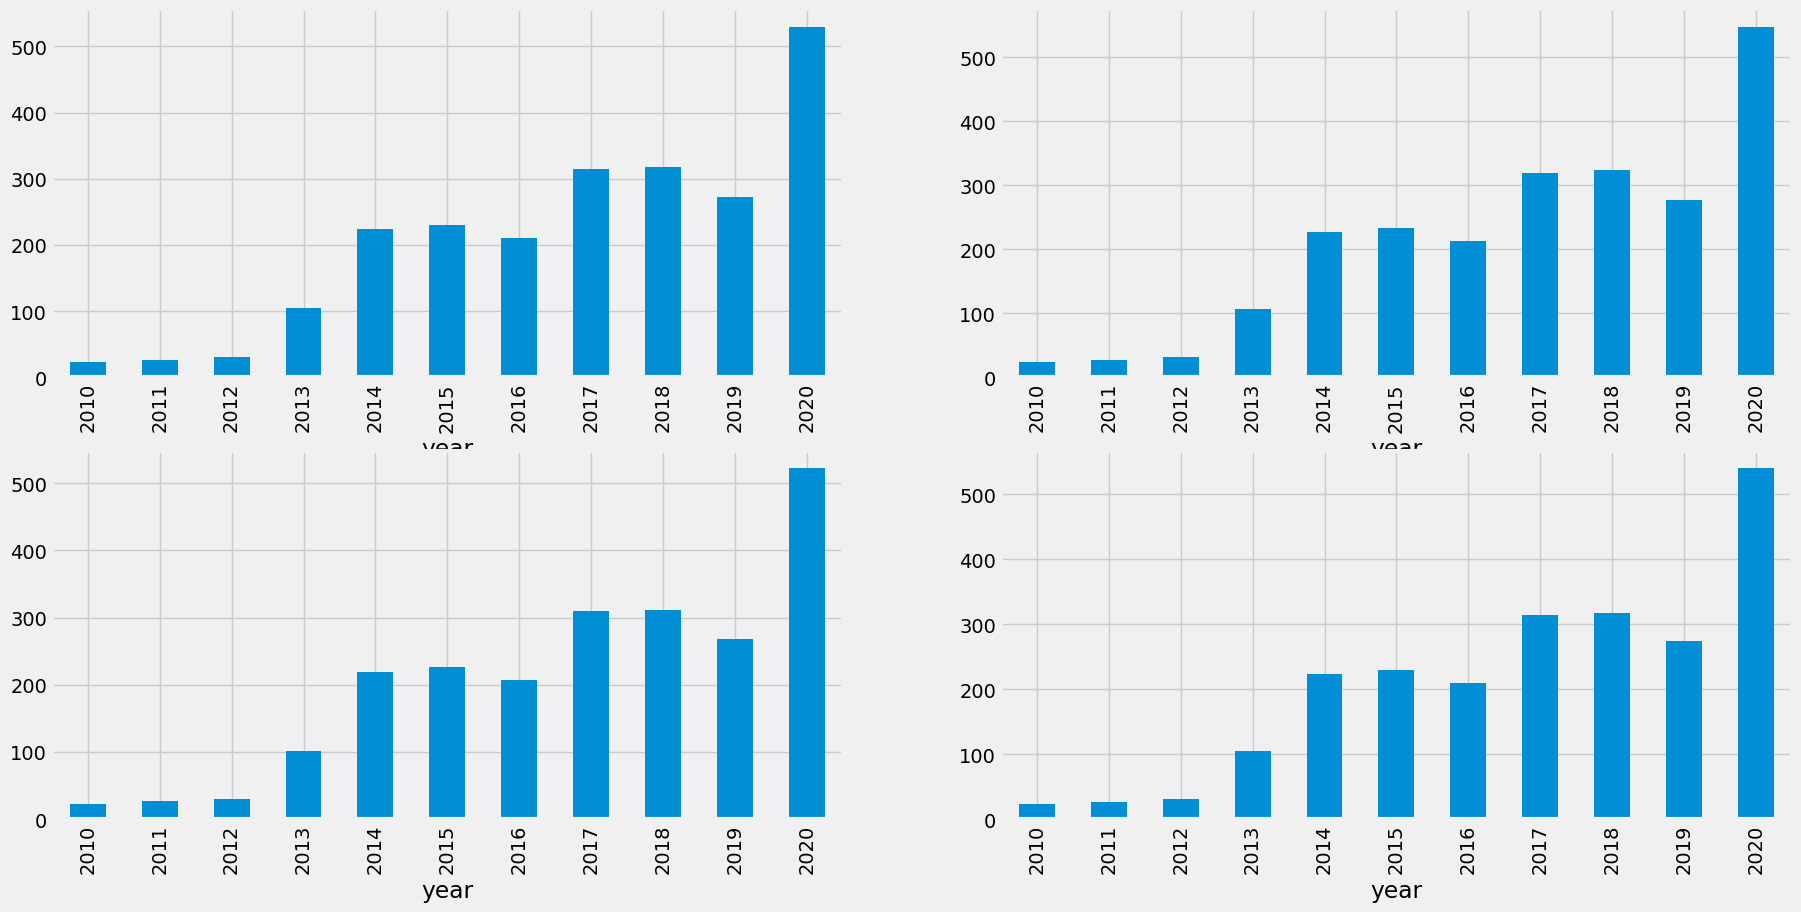

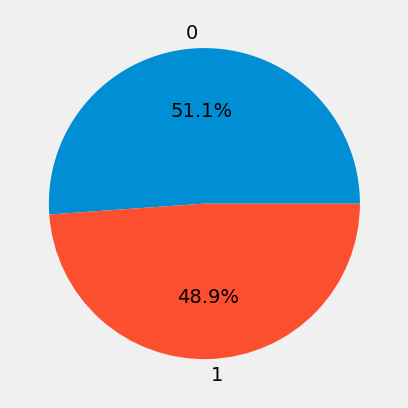

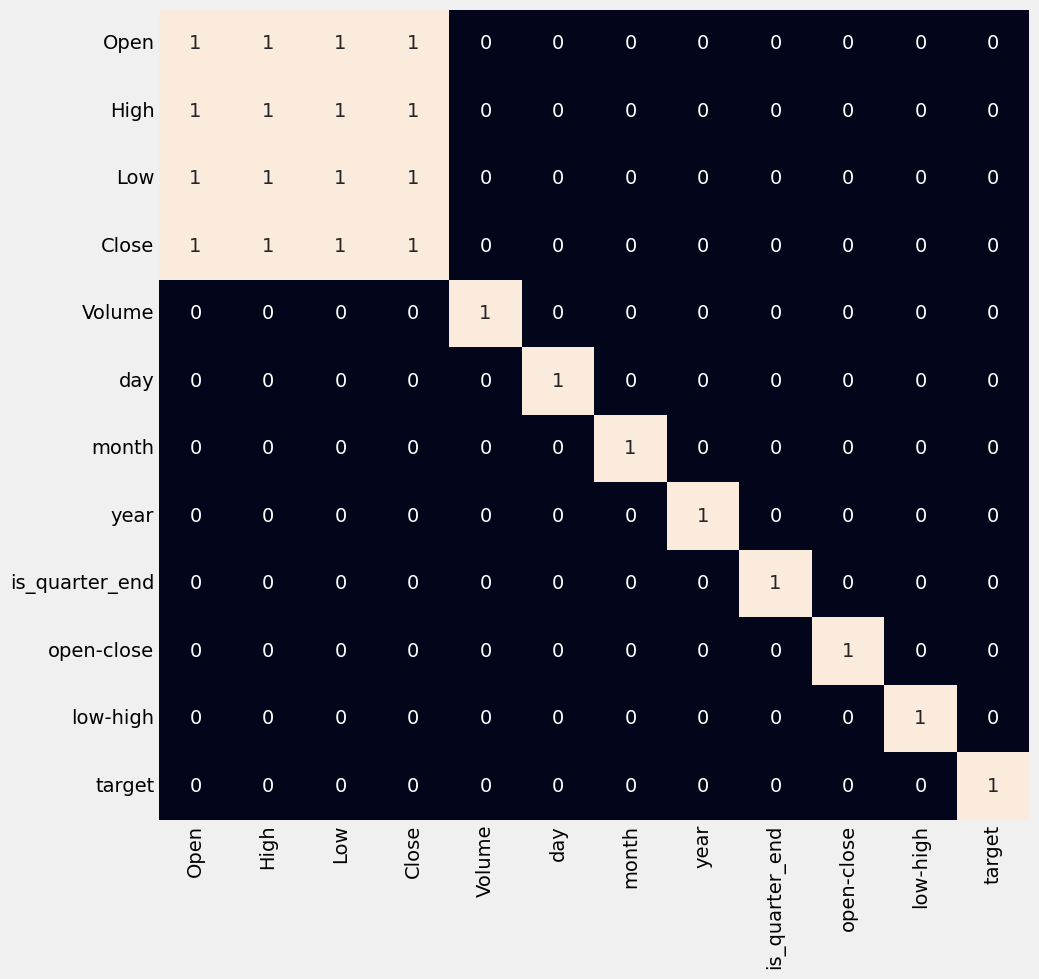

(2174, 3) (242, 3)
SVC(kernel='poly', probability=True):
Training Accuracy: 0.5294580830338206
Validation Accuracy: 0.46257525998905313


In [ ]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('TSLA.csv')
print(df.head())
print(df.shape)
print(df.describe())
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()
df[df['Close'] == df['Adj Close']].shape
df = df.drop(['Adj Close'], axis=1)
df.isnull().sum()
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

print(df.head())
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()
df.groupby('is_quarter_end').mean()
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)
models = [LogisticRegression(), SVC(kernel='poly', probability=True)]

for i in range(2):
    models[i].fit(X_train, Y_train)

print(f'{models[i]}:')
print('Training Accuracy:', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy:', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
